# todotodotodo
todotodotodoto

In [2]:
import os
from pathlib import Path
from sqlalchemy import create_engine

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

In [3]:
# Define your database file path (SQLite example)
rel_db_path = Path.cwd().parent.parent / 'raw_data' / 'nfl' / 'src_code' / 'nfl.db'
db_file_path = rel_db_path.resolve()

In [4]:
engine = create_engine(f'sqlite:///{db_file_path}')

In [5]:
%load_ext sql

In [6]:
%sql sqlite:///{db_file_path}

In [7]:
%%sql
SELECT *
FROM nfl_results
LIMIT 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


ranker,player,team,fantasy_pos,age,g,gs,pass_cmp,pass_att,pass_yds,pass_td,pass_int,rush_att,rush_yds,rush_yds_per_att,rush_td,targets,rec,rec_yds,rec_yds_per_rec,rec_td,fumbles,fumbles_lost,all_td,two_pt_md,two_pt_pass,fantasy_points,fantasy_points_ppr,draftkings_points,fanduel_points,vbd,fantasy_rank_pos,fantasy_rank_overall,player_id,Year
1,David Johnson*+,ARI,RB,25,16,16,0,0,0,0,0,293,1239,4.23,16,120,80,879,10.99,4,5.0,3,20,1.0,None,328.0,407.8,416.8,367.8,191.0,1,1.0,JohnDa08,2016
2,Ezekiel Elliott*+,DAL,RB,21,15,15,0,0,0,0,0,322,1631,5.07,15,39,32,363,11.34,1,5.0,1,16,None,None,293.0,325.4,332.4,309.4,156.0,2,2.0,ElliEz00,2016
3,Aaron Rodgers*,GNB,QB,33,16,16,401,610,4428,40,7,67,369,5.51,4,0,0,0,None,0,8.0,4,4,1.0,1.0,380.0,380.0,397.0,387.0,119.0,1,3.0,RodgAa00,2016
4,LeSean McCoy*,BUF,RB,28,15,15,0,0,0,0,0,234,1267,5.41,13,57,50,356,7.12,1,3.0,0,14,1.0,None,248.0,298.3,304.3,273.3,111.0,3,4.0,McCoLe01,2016
5,Le'Veon Bell*,PIT,RB,24,12,12,0,1,0,0,0,261,1268,4.86,7,94,75,616,8.21,2,4.0,1,9,1.0,None,242.0,317.4,324.4,279.9,105.0,4,5.0,BellLe00,2016
6,DeMarco Murray*,TEN,RB,28,16,16,1,2,10,1,0,293,1287,4.39,9,67,53,377,7.11,3,3.0,1,12,None,None,241.0,293.8,300.8,267.3,104.0,5,6.0,MurrDe00,2016
7,Devonta Freeman*,ATL,RB,24,16,16,0,0,0,0,0,227,1079,4.75,11,65,54,462,8.56,2,1.0,1,13,None,None,230.0,284.1,291.1,257.1,93.0,6,7.0,FreeDe00,2016
8,LeGarrette Blount,NWE,RB,30,16,8,0,0,0,0,0,299,1161,3.88,18,8,7,38,5.43,0,2.0,1,18,None,None,226.0,232.9,236.9,229.4,89.0,7,8.0,BlouLe00,2016
9,Matt Ryan*+,ATL,QB,31,16,16,373,534,4944,38,7,35,117,3.34,0,0,0,0,None,0,4.0,2,0,1.0,1.0,347.0,347.5,362.5,354.5,87.0,2,9.0,RyanMa00,2016
10,Mike Evans*,TAM,WR,23,16,16,0,0,0,0,0,0,0,None,0,173,96,1321,13.76,12,0.0,0,12,2.0,None,208.0,304.1,307.1,256.1,82.0,1,10.0,EvanMi00,2016


- keep in mind that a TIMESHARE backfield is one where someone has a LOT of points but doesn't get starts.

- high g but lower gs

- note: look later into people getting points from TD scoring or from production

- start: average games played for the top 30 scoring for each position by points PER GAME

- then: look at how often high PPG players play different percentages of the season

- finally: compare the PPG finish vs the actual finish to see when people dissapoint?

- also look at percent of games played by age of the player in the season? 

In [28]:
percent_played = """
SELECT
    year,
    fantasy_pos,
    player,
    fantasy_points,
    g,
    ROUND(fantasy_points / g) AS fppg,
    ROUND(g / (IIF(year >= 2021, 17, 16)*1.00),2) AS pgp
FROM nfl_results
WHERE 1=1
    AND G > 1
    AND GS > 1
    AND ROUND(fantasy_points / g) > 5
ORDER BY fantasy_points / g DESC
"""

In [29]:
%%sql
$percent_played
limit 10

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


Year,fantasy_pos,player,fantasy_points,g,fppg,pgp
2019,QB,Lamar Jackson*+,416.0,15,28.0,0.94
2020,QB,Dak Prescott,135.0,5,27.0,0.31
2018,QB,Patrick Mahomes*+,417.0,16,26.0,1.0
2022,QB,Jalen Hurts*,378.0,15,25.0,0.88
2020,QB,Patrick Mahomes*,374.0,15,25.0,0.94
2022,QB,Josh Allen*,396.0,16,25.0,0.94
2020,QB,Josh Allen*,395.0,16,25.0,1.0
2022,QB,Patrick Mahomes*+,416.0,17,24.0,1.0
2020,RB,Christian McCaffrey,73.0,3,24.0,0.19
2017,QB,Deshaun Watson,169.0,7,24.0,0.44


 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


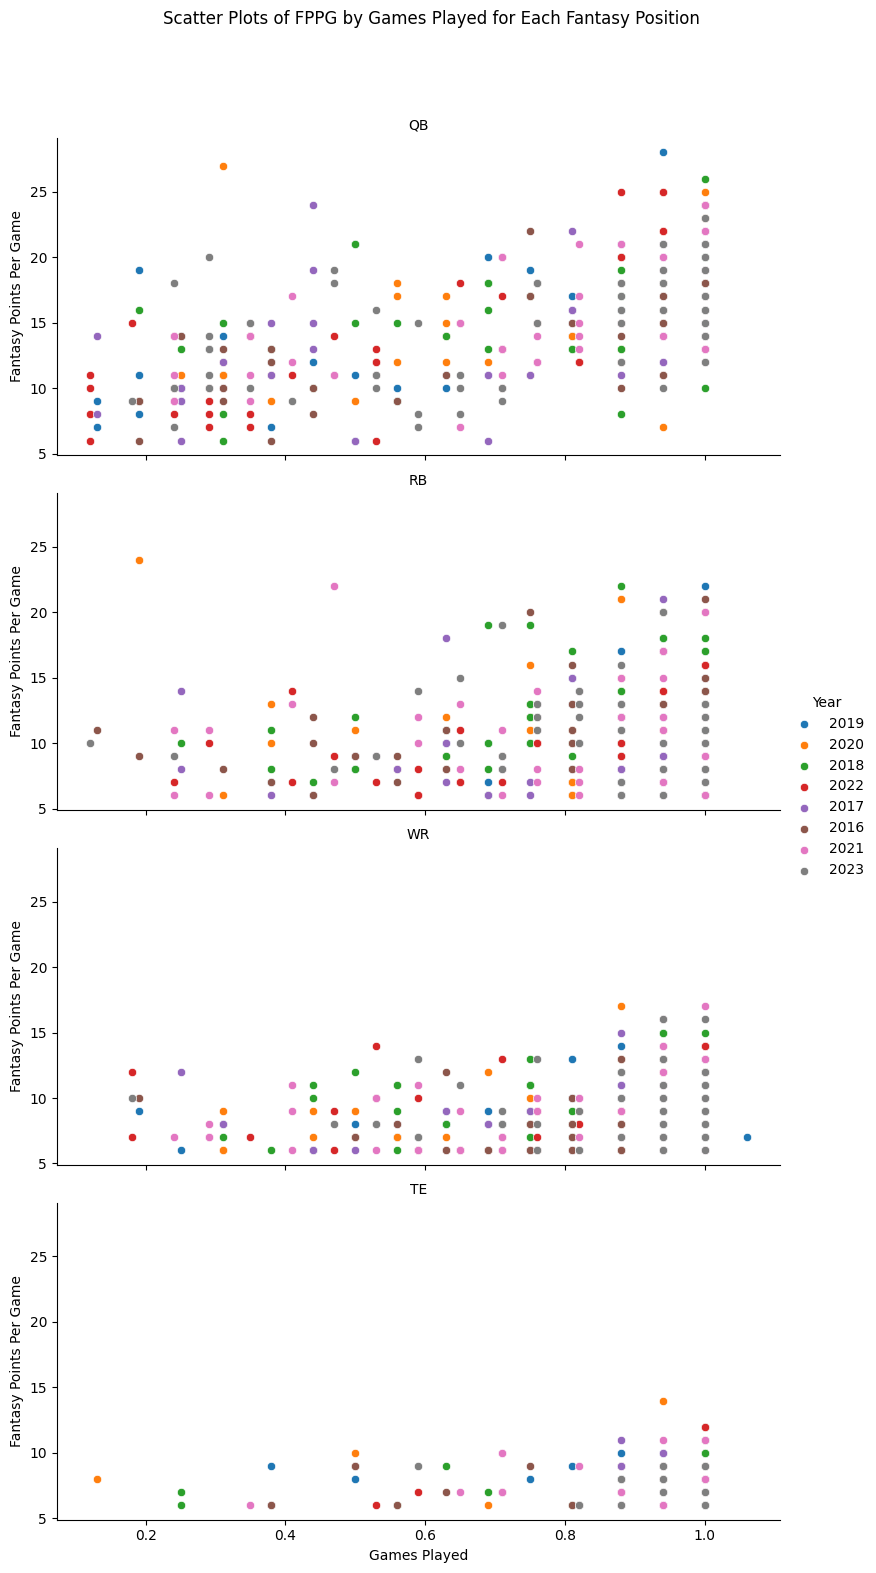

In [38]:
percent_played_data = %sql $percent_played

# Sample DataFrame (replace with your actual DataFrame)
data = percent_played_data
df = pd.DataFrame(data)

# Create a FacetGrid
g = sns.FacetGrid(df, row="fantasy_pos", hue="Year", aspect=2, height=4)

# Map the scatterplot onto the grid
g.map(sns.scatterplot, "pgp", "fppg").add_legend(title='Year')

# Customize the plot
g.set_axis_labels("Games Played", "Fantasy Points Per Game")
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of FPPG by Games Played for Each Fantasy Position')

# Add mplcursors for interactive hover labels
for ax in g.axes.flat:
    scatter = ax.collections[0]  # Get the scatter plot in each subplot
    cursor = mplcursors.cursor(scatter, hover=True)
    cursor.connect("add", lambda sel: sel.annotation.set_text(df.iloc[sel.target.index]['Player']))

plt.show()


In [49]:
import plotly.express as px

percent_played_data = %sql $percent_played

# Sample DataFrame (replace with your actual DataFrame)
data = percent_played_data
df = pd.DataFrame(data)

# Create a scatter plot grid using Plotly
fig = px.scatter(df, x='pgp', y='fppg', color='Year', facet_row='fantasy_pos', hover_name='player')

# Update layout for better display
fig.update_layout(
    title='Scatter Plot Grid with Plotly',
    xaxis_title='Games Played',
    yaxis_title='Fantasy Points Per Game',
    height=800,  # Adjust height for better visibility
)

fig.show()

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


In [55]:
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, HoverTool

percent_played_data = %sql $percent_played

# Sample DataFrame (replace with your actual DataFrame)
data = percent_played_data
df = pd.DataFrame(data)

# Create a Bokeh plot grid
plots = []
for pos in df['fantasy_pos'].unique():
    subset = df[df['fantasy_pos'] == pos]
    source = ColumnDataSource(subset)

    # Create figure for each row in the grid
    p = figure(width=800, height=300, title=f"Fantasy Position: {pos}",
               x_axis_label='Games Played', y_axis_label='Fantasy Points Per Game')

    # Add scatter plot
    p.scatter('pgp', 'fppg', size=10, source=source, color='Year', legend_field='Year')

    # Add hover tool with player name
    hover = HoverTool()
    hover.tooltips = [("Player", "@Player")]
    p.add_tools(hover)

    plots.append(p)

# Create a grid layout
grid = gridplot(plots, ncols=1, toolbar_location='above')

# Show the plot
show(grid)


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : LegendItem(id='p1725', ...)
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : LegendItem(id='p1821', ...)
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : fill_color='year' [closest match: 'Year'], hatch_color='year' [closest match: 'Year'], line_color='year' [closest match: 'Year'] {renderer: GlyphRenderer(id='p1817', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected colu

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


In [12]:
%%sql
SELECT
    year,
    fantasy_pos,
    player,
    g,
    gs,
    fantasy_points,
    ROUND(fantasy_points / g) AS fppg,
    ROUND(fantasy_points / gs) AS fppgs,
    fantasy_rank_pos
    # ADD IN A RANK TO COMPARE FPPG_RANK_POS VS FANTASY_RANK_POS
    # TO SEE IF HIGH VALUE PLAYERS GET INJURED OR IF PLAYERS "POP" FOR A SHORT DURATION OF TIME
FROM nfl_results
WHERE 1=1
    AND fantasy_pos = 'RB'
    AND G > 1
ORDER BY fantasy_points / g DESC
LIMIT 30
;

 * sqlite:////Users/beoconno/Documents/ff/ff_data/raw_data/nfl/src_code/nfl.db
Done.


Year,fantasy_pos,player,g,gs,fantasy_points,fppg,fppgs,fantasy_rank_pos
2020,RB,Christian McCaffrey,3,3,73.0,24.0,24.0,51
2018,RB,Todd Gurley*+,14,14,313.0,22.0,22.0,1
2019,RB,Christian McCaffrey*+,16,16,355.0,22.0,22.0,1
2021,RB,Derrick Henry,8,8,175.0,22.0,22.0,14
2017,RB,Todd Gurley*+,15,15,319.0,21.0,21.0,1
2020,RB,Dalvin Cook*,14,14,294.0,21.0,21.0,3
2016,RB,David Johnson*+,16,16,328.0,21.0,21.0,1
2023,RB,Christian McCaffrey*+,16,16,324.0,20.0,20.0,1
2016,RB,Le'Veon Bell*,12,12,242.0,20.0,20.0,4
2020,RB,Alvin Kamara*,15,10,295.0,20.0,30.0,2
